In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import scipy.spatial 

## Task 1

The first task is to import and preprocess the data set. Construct your output vector y by assigning
labels {−1,+1} to members of different parties. Then construct the input vectors x𝑗 corresponding to
the voting records of each member by replacing ’y’ votes with +1, ’n’ votes with −1 and ’?’ with 0.
You do not need to center and normalize the data set in this case. This leads to a vector y ∈R435 and
input matrix 𝑋 ∈R435×16. Note that we are using the sklearn convention for our 𝑋 matrix.

In [76]:
# Load data
temp = (np.loadtxt('drive/MyDrive/AMATH482/HW4/house-votes-84.data', delimiter=',', dtype=object, unpack=True)).T


# Preprocess data

# New matrix
d = np.zeros(temp.shape)

rep = ['republican', 'n']
dem = ['democrat', 'y']

# Iterate through temp and replace values
for i in range(d.shape[0]):
  row = temp[i]
  for j in range(d.shape[1]):
    if row[j] in rep:
      d[i,j] = -1
    elif row[j] in dem:
      d[i,j] = 1
    else:
      d[i,j] = 0
print(temp)
print(d)

X = d[:,1:]
y = d[:,0]

[['republican' 'n' 'y' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' 'n' '?']
 ['democrat' '?' 'y' ... 'y' 'n' 'n']
 ...
 ['republican' 'n' '?' ... 'y' 'n' 'y']
 ['republican' 'n' 'n' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' '?' 'n']]
[[-1. -1.  1. ...  1. -1.  1.]
 [-1. -1.  1. ...  1. -1.  0.]
 [ 1.  0.  1. ...  1. -1. -1.]
 ...
 [-1. -1.  0. ...  1. -1.  1.]
 [-1. -1. -1. ...  1. -1.  1.]
 [-1. -1.  1. ...  1.  0. -1.]]


## Task 2: Spectral Clustering

Construct the unnormalized graph Laplacian matrix on 𝑋 with variance parameter 𝜎 and compute its second eigenvector (i.e., the Fiedler vector) which we
denote as q1.

In [41]:
# Weight function for creation of weight matrix W
def eta(tt, rr):

 val = np.exp( - (tt**2)/(2*rr**2) ) 
  
 return val.astype(float)

In [77]:
dist = scipy.spatial.distance_matrix( X, X, p =2)

In [80]:
# Create classifier from second eigenvector

# Find optimal value for sigma
sigmas = np.arange(.01, 4, .01)

accuracies = []

for s in sigmas:
  W = eta(dist, s)
  # Compute Laplacian matrix
  d = np.sum(W, axis=1) # degree vector

  D = np.diag(d)

  L = D - W # unnormalized

  # compute eigendecompositions 

  ll, VV = np.linalg.eigh(L)

  # we need to sort the eigenvalues and vectors 

  idx = ll.argsort()
  l = ll[idx]
  V = VV[:, idx]

  # Create classifier from second eigenvector
  classifier1 = np.sign(V[:,1])
  classifier2 = -np.sign(V[:,1])
  count1 = sum(classifier1 == y)
  count2 = sum(classifier2 == y)
  if count1 > count2:
    count = count1
  else:
    count = count2
  
  accuracy = count / 435
  accuracies.append(accuracy)


In [81]:
print("max accuracy: ", np.max(accuracies))
print("sigma:", sigmas[np.argmax(accuracies)])


max accuracy:  0.8804597701149425
sigma: 1.1600000000000001


Text(0.5, 1.0, 'Clustering Accuracy vs $\\sigma$')

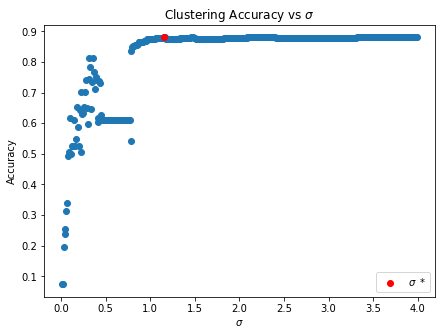

In [107]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(sigmas, accuracies)
ax.scatter(sigmas[np.argmax(accuracies)], np.max(accuracies), color="red", label="$\sigma ^ *$")
ax.legend(loc="lower right")
ax.set_xlabel("$\sigma$")
ax.set_ylabel("Accuracy")
ax.set_title("Clustering Accuracy vs $\sigma$")